# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

In [1]:
# importing the relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the iowa liquor sales dataset

idf = pd.read_csv('./data/iowa.csv')

idf.head(10)

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00
5,S32243000024,05/10/2016,5167,NEW STAR LIQUOR & TOBACCO / FT DODG,50501,IRISH WHISKIES,PERNOD RICARD USA/AUSTIN NICHOLS,15677,POWERS IRISH WHISKEY,1000,16.49,24.74,1,24.74
6,S16316700048,12/18/2013,2536,HY-VEE / PLEASANT HILL,50317,PUERTO RICO & VIRGIN ISLANDS RUM,"BACARDI U.S.A., INC.",43036,BACARDI GOLD RUM,750,7.54,11.31,12,135.72
7,INV-84044800086,06/30/2025,2637,HY-VEE #5 / DAVENPORT,52804,AMERICAN BRANDIES,SAZERAC COMPANY INC,55066,MR BOSTON BLACKBERRY BRANDY,750,5.00,7.50,12,90.00
8,INV-14344700002,09/10/2018,3611,LOGAN SUPER FOODS,51546,CANADIAN WHISKIES,JIM BEAM BRANDS,15246,WINDSOR CANADIAN,750,4.67,7.01,12,84.12
9,S08759700117,11/05/2012,2623,HY-VEE FOOD STORE #4 / SIOUX CITY,51104,SPICED RUM,DIAGEO AMERICAS,43334,CAPTAIN MORGAN SPICED RUM,375,4.50,6.74,6,40.44


Q. 1.1 How do you define the most profitable item? Why? Explain your thinking

Profitability comes from the difference between what the state earns from selling a bottle vs. what the state paid for it.

- Unit profit per bottle = State Bottle Retail - State Bottle Cost

- Total profit for each transaction = Unit profit per bottle × Bottles Sold

The most profitable item overall should be defined as the liquor brand/description that generates the highest total profit, not just the highest unit margin.

Example: An expensive whiskey may have a $10 profit per bottle but only sell 50 bottles.

Meanwhile, a cheaper vodka may only have a $2 profit per bottle but sell 5,000 bottles — making it more profitable overall.

So: most profitable = highest total profit across all sales.

In [3]:
# Q 1.b. Finding the most profitable liquors sold in Iowa

# Calculate profit per bottle
idf['Unit_Profit'] = idf['State Bottle Retail'] - idf['State Bottle Cost']

# Calculate total profit per transaction
idf['Total_Profit'] = idf['Unit_Profit'] * idf['Bottles Sold']

# Group by Item Description to get total profit per liquor
profit_df = idf.groupby('Item Description')['Total_Profit'].sum().sort_values(ascending=False).reset_index()

#print(profit_df)

# View top 10 most profitable liquors
top_liquors_df = profit_df.head(10)

print(top_liquors_df)

                  Item Description  Total_Profit
0             TITOS HANDMADE VODKA     364074.35
1                     BLACK VELVET     274676.85
2        FIREBALL CINNAMON WHISKEY     187535.22
3                      CROWN ROYAL     160981.95
4          CROWN ROYAL REGAL APPLE     122880.40
5        CAPTAIN MORGAN SPICED RUM     121115.30
6                    HAWKEYE VODKA     116375.04
7   CAPTAIN MORGAN ORIGINAL SPICED     112146.71
8  JACK DANIELS OLD #7 BLACK LABEL     111509.09
9                      HENNESSY VS     108459.45


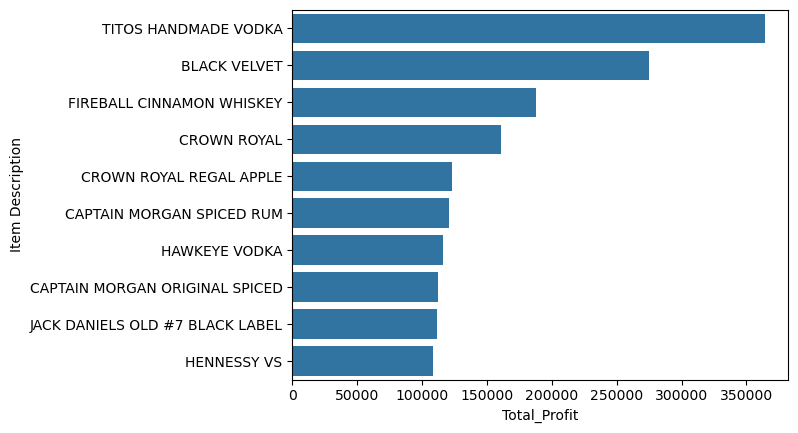

In [4]:
# Q 1.c. Make a plot of the top liquors

sns.barplot(
    x="Total_Profit",
    y="Item Description",
    data=top_liquors_df
)

plt.show()


2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [7]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

In [8]:
# Q 2.a. What happens when you try to subtract the two vectors x vs y? 

x - y


ValueError: operands could not be broadcast together with shapes (3,) (2,) 

*Explanation:*

> x is of shape (3,) and y is of shape (2,), so they are not compatible for direct subtraction

In [9]:
# Q 2.b. What happens when you reshape them ?

x_reshaped = x.reshape(-1,1)
x_reshaped

# Reshape x to be a column vector

array([[1],
       [3],
       [5]])

In [10]:
y_reshaped = y.reshape(1,-1)
y_reshaped 

# Reshape y to be a row vector

array([[2, 5]])

In [11]:
# Now we can subtract them using broadcasting
x.reshape(-1,1)-y.reshape(1,-1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

*Explanation:*

NumPy broadcasts:

(3,1) minus (1,2) → result shape (3,2)

Each row corresponds to one element of x minus all elements of y

In [12]:
# Q 2.c. Reverse the order of reshaping and subtract again.

x.reshape(1,-1)-y.reshape(-1,1)

array([[-1,  1,  3],
       [-4, -2,  0]])

*Explanation:*

Numpy Broadcast (2,1) - (1,3) → shape (2,3)

Now each row corresponds to one element of y minus all elements of x (or vice versa, depending on ordering)

*Q 2. d. Write two double for-loops to replicate the results of the previous two answers*


*Part 1 - i.e  : x.reshape(-1,1)-y.reshape(1,-1)*

> This gives a 3×2 matrix where each row corresponds to an element of x, and each column to an element of y. So the element at [i][j] is x[i] - y[j]

In [13]:
result1 = np.zeros((len(x), len(y)))  # shape (3, 2) # initializing a zero matrix

result1

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [14]:
# for-loops to replicate the results of the part 1 - i.e  : x.reshape(-1,1)-y.reshape(1,-1)

for i in range(len(x)):
    for j in range(len(y)):
        result1[i][j] = x[i] - y[j]

print(result1)

[[-1. -4.]
 [ 1. -2.]
 [ 3.  0.]]


*Part 2 - i.e  : x.reshape(1,-1) - y.reshape(-1,1))*

> This gives a 2×3 matrix where each row corresponds to an element of y, and each column to an element of x. So the element at [i][j] is x[j] - y[i]

In [15]:
result2 = np.zeros((len(y), len(x)))  # shape (2, 3)

for i in range(len(y)):
    for j in range(len(x)):
        result2[i][j] = x[j] - y[i]

print(result2)

[[-1.  1.  3.]
 [-4. -2.  0.]]


Q: 2. e. Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [16]:
x.reshape(1,-1)

array([[1, 3, 5]])

In [17]:
x.reshape(-1,1)

array([[1],
       [3],
       [5]])

*Explanation:*

> Reshaping does not change the data, only the dimensions, which allows NumPy to broadcast properly against other arrays

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

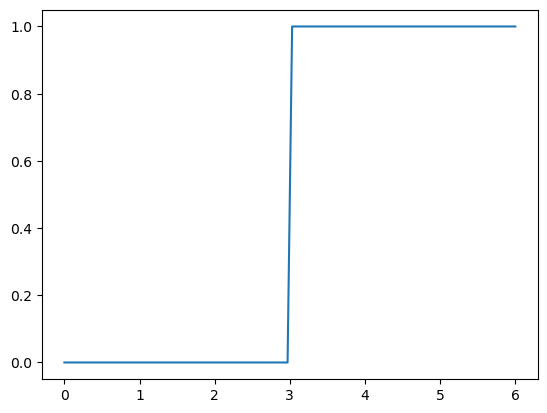

In [18]:
# Q 3. a. for x = 3 plot the indicator function for any z

x = 3
z = np.linspace(0,6,100)

I = (x <= z).astype(int)

plt.plot(z, I)

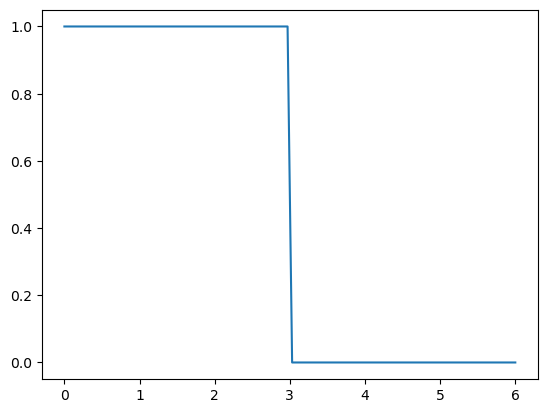

In [19]:
# Q 3. b. Plot how the compliment of the indicator function look ?

x = 3
z = np.linspace(0, 6, 100)  # Range of z values

II = (x > z).astype(int)  # This is I{x > z}

plt.plot(z, II)

In [4]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here:


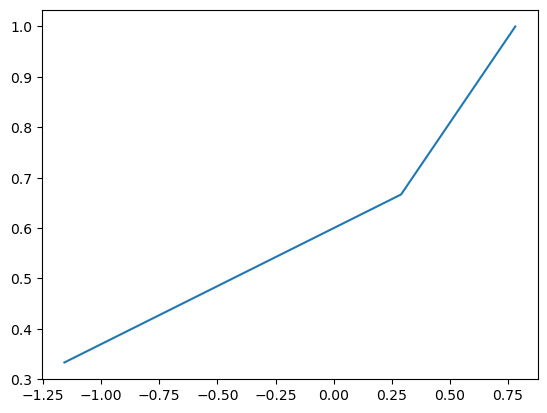

In [20]:
rng = np.random.default_rng(100)
N = 3 

X = rng.normal(0,1,N)

X = np.sort(X)  # Sort the data

ecdf = np.arange(1, N + 1) / N

sns.lineplot(x=X, y=ecdf)
plt.show()

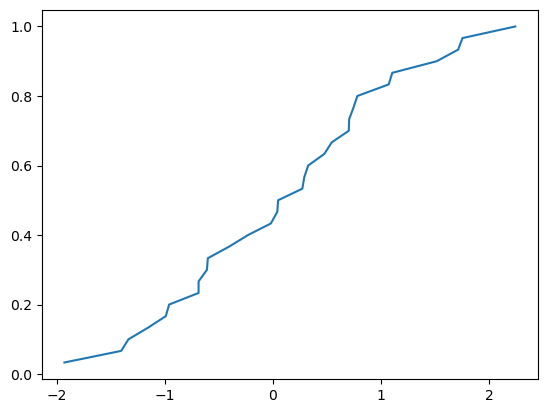

In [21]:
rng = np.random.default_rng(100)
N = 30 

X = rng.normal(0,1,N)

X = np.sort(X)  # Sort the data

ecdf = np.arange(1, N + 1) / N

sns.lineplot(x=X, y=ecdf)
plt.show()

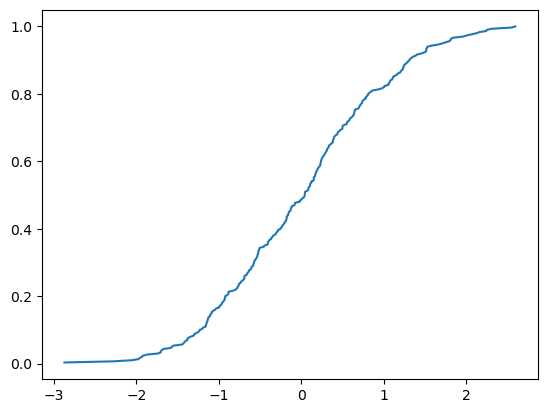

In [22]:
rng = np.random.default_rng(100)
N = 300 

X = rng.normal(0,1,N)

X = np.sort(X)  # Sort the data

ecdf = np.arange(1, N + 1) / N

sns.lineplot(x=X, y=ecdf)
plt.show()

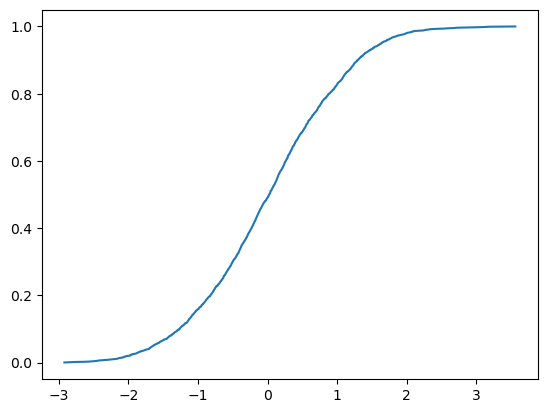

In [23]:
rng = np.random.default_rng(100)
N = 3000 

X = rng.normal(0,1,N)

X = np.sort(X)  # Sort the data

ecdf = np.arange(1, N + 1) / N

sns.lineplot(x=X, y=ecdf)
plt.show()

*Explanation:*

As the sample size 𝑁 increases, the (ECDF) function becomes smoother and more representative of the underlying distribution. 

With small samples, the ECDF appears step-like, with each data point contributing a noticeable jump. 

As more observations are added, these jumps become smaller and more frequent, gradually forming a curve that closely resembles the true cumulative distribution. 

In large samples, the ECDF provides a reliable, non-parametric estimate of the population’s behavior, reducing the influence of random variation.

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [24]:
# Q. 4. a Write a function to compute the q-th quantile of a dataset

def quantile(data, q):

    sorted_data = np.sort(data)
    n = len(sorted_data)
    index = int(q * (n-1))
    
    return sorted_data[index]



In [25]:
# Q. 4. b Write a function to compute the IQR, lower whisker, and upper whisker of a dataset

def iqr_whiskers(data):
   
    q1 = quantile(data, 0.25)
    q3 = quantile(data, 0.75)

    iqr = q3 - q1
    
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    
    return iqr, lower_whisker, upper_whisker

In [26]:
# Q. 4. c Write a function to compute the five-number summary of a dataset

def five_number_summary(data):
    
    data_min = min(data)
    data_max = max(data)
    
    q1 = quantile(data, 0.25)
    median = quantile(data, 0.5)
    q3 = quantile(data, 0.75)
    
    iqr = q3 - q1
    
    lower_whisker = max(data_min, q1 - 1.5*iqr)
    upper_whisker = min(data_max, q3 + 1.5*iqr)
    
    return {
        "min": data_min,
        "Q1": q1,
        "median": median,
        "Q3": q3,
        "max": data_max,
        "IQR": iqr,
        "lower_whisker": lower_whisker,
        "upper_whisker": upper_whisker
    }

In [27]:
# Q. 4. d Write a function that returns a Boolean vector indicating if the observations are outliers

def outliers(data):
    
    summary = five_number_summary(data)
    
    return [
        (x < summary["lower_whisker"]) 
        or (x > summary["upper_whisker"]) 
        for x in data]



{'min': 20, 'Q1': 750, 'median': 750, 'Q3': 1000, 'max': 6000, 'IQR': 250, 'lower_whisker': 375.0, 'upper_whisker': 1375.0}
[False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, True, False, True, True, False]


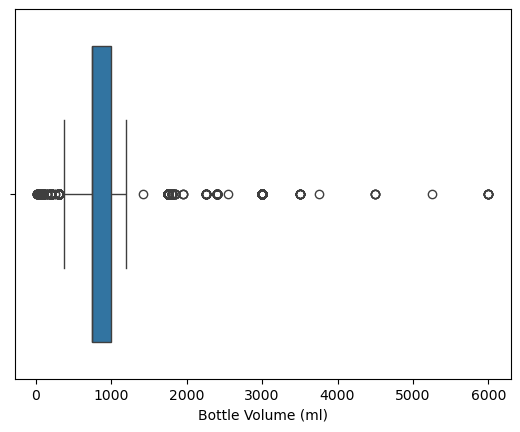

count    159904.000000
mean        869.592737
std         513.812818
min          20.000000
25%         750.000000
50%         750.000000
75%        1000.000000
max        6000.000000
Name: Bottle Volume (ml), dtype: float64


In [36]:
# 4 e. Apply your functions the iowa liquor sales dataset

idf = pd.read_csv('./data/iowa.csv')

# Choose numeric variable
x = idf['Bottle Volume (ml)']

# Compute summary
summary = five_number_summary(x)

print(summary)

# Identify outliers
outliers_bool = outliers(x)
print(outliers_bool[:20])

# Plot with Seaborn
sns.boxplot(x=x)
plt.show()

# Compare with df.describe
print(x.describe())




*Explanation:* 

- Most bottles are between 750 ml (Q1) and 1000 ml (Q3).

- The IQR (interquartile range) is 250 ml.

- The whiskers extend from 375 ml to 1375 ml.

- Anything below 375 ml or above 1375 ml is flagged as an outlier.

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?